# Project 14 - Predicting Restaurant Food Cost (Dynamic)

In [55]:
#data analysis libraries 
import pandas as pd
import numpy as np
import datetime

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [56]:
# Loading the train and test

test_data = pd.read_excel('Data/Restaurant_food_cost/Data_Train.xlsx')
train_data = pd.read_excel('Data/Restaurant_food_cost/Data_Test.xlsx')

In [57]:
train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [59]:
# Checkign the object datatypes and their unique values

for i in train_data.columns:
    if train_data[i].dtypes == object:
        print(str(i) + ' : ' + str(train_data[i].unique()))
        print(train_data[i].value_counts())
        print('****************************************************\n')

TITLE : ['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' '

In [60]:
test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


## EDA

In [61]:
print("\nEDA on Train Set\n")
print("#"*30)
print("\nFeatures/Columns : \n", train_data.columns)
print("\n\nNumber of Features/Columns : ", len(train_data.columns))
print("\nNumber of Rows : ",len(train_data))
print("\n\nData Types :\n", train_data.dtypes)
print('\n\n Shape of the train data:', train_data.shape)
print("\nContains NaN/Empty cells : ", train_data.isnull().values.any())
print("\nTotal empty cells by column :\n", train_data.isnull().sum(), "\n\n")


EDA on Train Set

##############################

Features/Columns : 
 Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')


Number of Features/Columns :  9

Number of Rows :  12690


Data Types :
 TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object


 Shape of the train data: (12690, 9)

Contains NaN/Empty cells :  True

Total empty cells by column :
 TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64 




In [62]:
# checking the no. of uniqueness

print('TITLE: ',train_data['TITLE'].nunique())
print('RESTAURANT_ID: ',train_data['RESTAURANT_ID'].nunique())
print('CUISINES: ',train_data['CUISINES'].nunique())
print('TIME: ',train_data['TIME'].nunique())
print('CITY: ',train_data['CITY'].nunique())
print('LOCALITY: ',train_data['LOCALITY'].nunique())
print('RATING: ',train_data['RATING'].nunique())
print('VOTES: ',train_data['VOTES'].nunique())

TITLE:  113
RESTAURANT_ID:  11892
CUISINES:  4155
TIME:  2689
CITY:  359
LOCALITY:  1416
RATING:  32
VOTES:  1847


#### Converting the column names in train and test data set with lower case

In [63]:
train_data.columns= train_data.columns.str.lower()

In [64]:
test_data.columns= test_data.columns.str.lower()

### Data Analysis

In [65]:
train_data.shape

(12690, 9)

In [66]:
test_data.shape

(4231, 8)

In [67]:
# Checking the Duplicates in Train Set
train_data.duplicated().sum()

25

In [68]:
# Checking the Duplicates in Test Set
test_data.duplicated().sum()

1

In [69]:
# dropping the duplicates from train dataset
train_data= train_data.drop_duplicates()

In [70]:
# dropping the duplicates from test dataset
test_data= test_data.drop_duplicates()

In [71]:
test_data.shape

(4230, 8)

### Missing Values

In [72]:
# Missing values in train set
train_data.isnull().sum()

title               0
restaurant_id       0
cuisines            0
time                0
city              112
locality           98
rating              2
votes            1200
cost                0
dtype: int64

In [73]:
# Missing values in test set
test_data.isnull().sum()

title              0
restaurant_id      0
cuisines           0
time               0
city              35
locality          30
rating             2
votes            402
dtype: int64

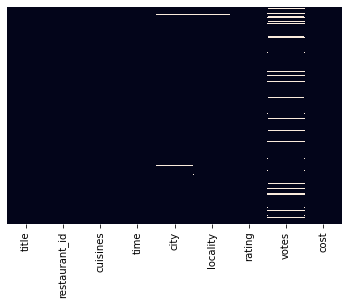

In [74]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

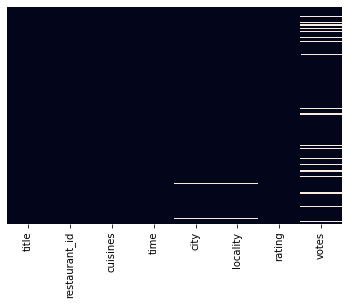

In [75]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False)

Observation: Missing values present in the CITY, LOCALITY, RATING AND VOTES    

### Filling the Missing value of the Categorical Type

In [76]:
# Converting the missing value of Categorical type
for i in ['city', 'locality', 'rating', 'votes']:
    train_data[i].fillna(train_data[i].mode()[0],inplace=True)
    test_data[i].fillna(test_data[i].mode()[0], inplace=True)

In [77]:
# Extracting the interger value from the Votes Column
train_data['votes'] = train_data['votes'].str.split().str[0].astype('int')
test_data['votes'] = test_data['votes'].str.split().str[0].astype('int')

In [78]:
# Check the uniqueness of the rating
train_data['rating'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [79]:
test_data['rating'].unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', 'NEW', '4.0', '3.4', '3.2',
       '4.1', '3.0', '-', '3.5', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5',
       '2.8', '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7',
       '2.3', '2.4', '2.2'], dtype=object)

In [80]:
# Converting the NEW and - to 2.5 and converting the object to float
train_data['rating'] = train_data['rating'].str.replace('NEW', '2.5')
train_data['rating'] = train_data['rating'].str.replace('-', '2.5').astype(float)

test_data['rating'] = test_data['rating'].str.replace('NEW', '2.5')
test_data['rating'] = test_data['rating'].str.replace('-', '2.5').astype(float)

### Data Analysis

In [81]:
#Combining trainig set and test sets for analysing data and finding patterns

train_temp = [train_data[['title', 'restaurant_id', 'cuisines', 'time', 'city', 'locality','rating', 'votes']], test_data]
train_temp = pd.concat(train_temp)

In [82]:
train_temp

,title,restaurant_id,cuisines,time,city,locality,rating,votes
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,2.5,6


In [83]:
# Analysing Titles 

titles = list(train_temp['title'])

# Finding Maximum number of titles mentioned in a single cell
maxim = 1
for i in titles :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum Titles in a Cell : ", maxim)    

all_titles = []

for i in titles :
    if len(i.split(',')) == 1:
         all_titles.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            all_titles.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique Titles : ", len(pd.Series(all_titles).unique()))
print("\n\nUnique Titles:\n", pd.Series(all_titles).unique())

all_titles = list(pd.Series(all_titles).unique())



Maximum Titles in a Cell :  2


Number of Unique Titles :  25


Unique Titles:
 ['CASUAL DINING' 'BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'BEVERAGE SHOP' 'IRANI CAFE' 'BAKERY' 'NONE' 'PUB'
 'FINE DINING' 'SWEET SHOP' 'LOUNGE' 'FOOD COURT' 'FOOD TRUCK' 'MESS'
 'KIOSK' 'CLUB' 'CONFECTIONERY' 'DHABA' 'MEAT SHOP' 'COCKTAIL BAR'
 'PAAN SHOP' 'BHOJANALYA']


In [84]:
# Analysing cuisines 

cuisines = list(train_temp['cuisines'])

maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum cuisines in a Cell : ", maxim)    

all_cuisines = []

for i in cuisines :
    if len(i.split(',')) == 1:
         #print(i.split(',')[0])
         all_cuisines.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            #print(i.split(',')[it])
            all_cuisines.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique Cuisines : ", len(pd.Series(all_cuisines).unique()))
print("\n\nUnique Cuisines:\n", pd.Series(all_cuisines).unique())

all_cuisines = list(pd.Series(all_cuisines).unique())



Maximum cuisines in a Cell :  8


Number of Unique Cuisines :  130


Unique Cuisines:
 ['MALWANI' 'GOAN' 'NORTH INDIAN' 'ASIAN' 'MODERN INDIAN' 'JAPANESE'
 'CHINESE' 'BIRYANI' 'HYDERABADI' 'TIBETAN' 'DESSERTS' 'SEAFOOD' 'CAFE'
 'PIZZA' 'BURGER' 'BAR FOOD' 'SOUTH INDIAN' 'FAST FOOD' 'BEVERAGES'
 'ARABIAN' 'MUGHLAI' 'MAHARASHTRIAN' 'PARSI' 'THAI' 'BAKERY' 'MOMOS'
 'CONTINENTAL' 'EUROPEAN' 'ROLLS' 'ANDHRA' 'ITALIAN' 'BBQ' 'FINGER FOOD'
 'TEA' 'AMERICAN' 'HEALTHY FOOD' 'COFFEE' 'INDONESIAN' 'KOREAN' 'NEPALESE'
 'ICE CREAM' 'MEXICAN' 'KERALA' 'INDIAN' 'MITHAI' 'STREET FOOD'
 'MALAYSIAN' 'VIETNAMESE' 'IRANIAN' 'KEBAB' 'JUICES' 'SANDWICH'
 'MEDITERRANEAN' 'SALAD' 'GUJARATI' 'RAJASTHANI' 'TEX-MEX' 'ROAST CHICKEN'
 'BURMESE' 'CHETTINAD' 'NORTH EASTERN' 'LEBANESE' 'COFFEE AND TEA' 'GRILL'
 '' 'BIHARI' 'BENGALI' 'LUCKNOWI' 'AWADHI' 'STEAK' 'FRENCH' 'PORTUGUESE'
 'WRAPS' 'SRI LANKAN' 'ORIYA' 'ETHIOPIAN' 'KONKAN' 'SUSHI' 'SPANISH'
 'RUSSIAN' 'MANGALOREAN' 'TURKISH' 'BUBBLE TEA' 'AFGHAN' 'NAGA'
 '

In [85]:
# Analysing CITY

all_cities = list(train_temp['city'])

for i in range(len(all_cities)):
    if type(all_cities[i]) == float:
        all_cities[i] = 'NOT AVAILABLE'
    all_cities[i] = all_cities[i].strip().upper()
        
print("\n\nNumber of Unique cities (Including NOT AVAILABLE): ", len(pd.Series(all_cities).unique()))
print("\n\nUnique Cities:\n", pd.Series(all_cities).unique())
 
all_cities = list(pd.Series(all_cities).unique())



Number of Unique cities (Including NOT AVAILABLE):  444


Unique Cities:
 ['THANE' 'CHENNAI' 'MUMBAI' 'BANGALORE' 'GURGAON' 'HYDERABAD' 'KOCHI'
 'THANE WEST' 'ANDHERI LOKHANDWALA' 'NEW DELHI' 'ANDHERI WEST'
 'MALAD EAST' '682036' 'BANGALOR' 'NAVI MUMBAI' 'BANDRA WEST' 'DELHI'
 'NOIDA' 'BANGALORE-560066' 'SECUNDERABAD' 'INDIA' 'MADHURANAGAR'
 'CHENNAI TEYNAMPET' 'FARIDABAD' 'CHEMBUR.' 'MAHARASHTRA'
 'OPP GURUDWARA SHAKURPUR' 'TELAGANA LAND LINE:040-48507016' 'GHAZIABAD'
 'KARNATAKA' 'KERALA' 'EDAPPALLY' 'KADAVANTHRA' 'ERNAKULAM CIRCLE KOCHI'
 'BENGALORE' 'NEAR RELIANCE FRESH' 'KILPAUK' 'BENGALURU' 'KOTHAGUDA'
 'GOREGAON WEST' 'BANGLORE' 'TAMIL NADU' 'KAKKANAD' 'KOCHI ELAMKULAM'
 'OUTER RING ROAD' 'MULUND EAST'
 'SECUNDERABAD MAIN ROAD NEAR SIGNAL NMREC COLLEGE' 'TELANGANA'
 'PONNURUNI KOCHI' 'GACHIBOWLI' 'SEMMANCHERI'
 '5TH MAIN TEACHERS COLONY KORAMANGALA BLOCK 1 BANGALORE 560034'
 'MUMBAI MAHIM' 'POWAI (NEXT TO POWAI PLAZA)' 'DOMBIVALI EAST'
 'KOCHI VYTTILA' 'KANDIVALI' 'KOCHI PALAR

In [86]:
# Cleaning LOCALITY

all_localities = list(train_temp['locality'])

for i in range(len(all_localities)):
    if type(all_localities[i]) == float:
        all_localities[i] = 'NOT AVAILABLE'
    all_localities[i] = all_localities[i].strip().upper()
        
print("\n\nNumber of Unique Localities (Including NOT AVAILABLE) : ", len(pd.Series(all_localities).unique()))
print("\n\nUnique Localities:\n", pd.Series(all_localities).unique())

all_localities = list(pd.Series(all_localities).unique())



Number of Unique Localities (Including NOT AVAILABLE) :  1610


Unique Localities:
 ['DOMBIVALI EAST' 'RAMAPURAM' 'SALIGRAMAM' ... 'OFF CARTER ROAD'
 'SRM BACK GATE' 'PERRY CROSS ROAD']


### Data Cleaning

In [87]:
# Cleaning Training Set
#______________________

# TITLE


titles = list(train_data['title'])

# Since Maximum number of titles in a cell is 2 will will split title in to 2 columns
T1 = []
T2 = []

for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')

# appending NONE to Unique titles list
all_titles.append('NONE')

#Cleaning CUISINES 

cuisines = list(train_data['cuisines'])
# Since Maximum number of cuisines in a cell is 8 will will split title in to 8 columns
   
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []


for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip().upper())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip().upper())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip().upper())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip().upper())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip().upper())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip().upper())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip().upper())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip().upper())
        except :
            C8.append('NONE')

# appending NONE to Unique cuisines list
all_cuisines.append('NONE')

# Cleaning CITY

cities = list(train_data['city'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NOT AVAILABLE'
    cities[i] = cities[i].strip().upper()
        

# Cleaning LOCALITY

localities = list(train_data['locality'])

for i in range(len(localities)):
    if type(localities[i]) == float:
        localities[i] = 'NOT AVAILABLE'
    localities[i] = localities[i].strip().upper()   
    

#Cleaning Rating

rates = list(train_data['rating'])

for i in range(len(rates)) :
    try:
       rates[i] = float(rates[i])
    except :
       rates[i] = np.nan

# Votes
       
votes = list(train_data['votes'])

for i in range(len(votes)) :
    try:
       votes[i] = int(votes[i].split(" ")[0].strip())
    except :
       pass       
    
    

new_data_train = {}

new_data_train['title1'] = T1
new_data_train['title2'] = T2
new_data_train['restaurant_id'] = train_data["restaurant_id"]
new_data_train['cuisines1'] = C1
new_data_train['cuisines2'] = C2
new_data_train['cuisines3'] = C3
new_data_train['cuisines4'] = C4
new_data_train['cuisines5'] = C5
new_data_train['cuisines6'] = C6
new_data_train['cuisines7'] = C7
new_data_train['cuisines8'] = C8
new_data_train['city'] = cities
new_data_train['locality'] = localities
new_data_train['rating'] = rates
new_data_train['votes'] = votes
new_data_train['cost'] = train_data["cost"]

new_data_train = pd.DataFrame(new_data_train)

In [88]:
# TITLE

titles = list(test_data['title'])

# Since Maximum number of titles in a cell is 2 will will split title in to 2 columns
T1 = []
T2 = []

for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')


#Cleaning CUISINES 

cuisines = list(test_data['cuisines'])
   
# Since Maximum number of cuisines in a cell is 8 will will split title in to 8 columns
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []


for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip().upper())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip().upper())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip().upper())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip().upper())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip().upper())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip().upper())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip().upper())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip().upper())
        except :
            C8.append('NONE')

# Cleaning CITY

cities = list(test_data['city'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NOT AVAILABLE'
    cities[i] = cities[i].strip().upper()
        

# Cleaning LOCALITY

localities = list(test_data['locality'])

for i in range(len(localities)):
    if type(localities[i]) == float:
        localities[i] = 'NOT AVAILABLE'
    localities[i] = localities[i].strip().upper()   
    

#Cleaning Rating

rates = list(test_data['rating'])

for i in range(len(rates)) :
    try:
       rates[i] = float(rates[i])
    except :
       rates[i] = np.nan

# Votes
       
votes = list(test_data['votes'])

for i in range(len(votes)) :
    try:
       votes[i] = int(votes[i].split(" ")[0].strip())
    except :
       pass       
    
    

new_data_test = {}

new_data_test['title1'] = T1
new_data_test['title2'] = T2
new_data_test['restaurant_id'] = test_data["restaurant_id"]
new_data_test['cuisines1'] = C1
new_data_test['cuisines2'] = C2
new_data_test['cuisines3'] = C3
new_data_test['cuisines4'] = C4
new_data_test['cuisines5'] = C5
new_data_test['cuisines6'] = C6
new_data_test['cuisines7'] = C7
new_data_test['cuisines8'] = C8
new_data_test['city'] = cities
new_data_test['locality'] = localities
new_data_test['rating'] = rates
new_data_test['votes'] = votes

new_data_test = pd.DataFrame(new_data_test)

In [89]:
new_data_train.head()

,title1,title2,restaurant_id,cuisines1,cuisines2,cuisines3,cuisines4,cuisines5,cuisines6,cuisines7,cuisines8,city,locality,rating,votes,cost
0,CASUAL DINING,NONE,9438,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,THANE,DOMBIVALI EAST,3.6,49,1200
1,CASUAL DINING,BAR,13198,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,CHENNAI,RAMAPURAM,4.2,30,1500
2,CASUAL DINING,NONE,10915,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,CHENNAI,SALIGRAMAM,3.8,221,800
3,QUICK BITES,NONE,6346,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,BANDRA WEST,4.1,24,800
4,DESSERT PARLOR,NONE,15387,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,LOWER PAREL,3.8,165,300


In [90]:
new_data_test.head()

,title1,title2,restaurant_id,cuisines1,cuisines2,cuisines3,cuisines4,cuisines5,cuisines6,cuisines7,cuisines8,city,locality,rating,votes
0,CASUAL DINING,NONE,4085,NORTH INDIAN,CHINESE,MUGHLAI,KEBAB,NONE,NONE,NONE,NONE,NOIDA,SECTOR 18,4.3,564
1,QUICK BITES,NONE,12680,SOUTH INDIAN,FAST FOOD,PIZZA,NORTH INDIAN,NONE,NONE,NONE,NONE,MUMBAI,GRANT ROAD,4.2,61
2,CASUAL DINING,NONE,1411,NORTH INDIAN,SEAFOOD,BIRYANI,CHINESE,NONE,NONE,NONE,NONE,MUMBAI,MARINE LINES,3.8,350
3,NONE,NONE,204,BIRYANI,NONE,NONE,NONE,NONE,NONE,NONE,NONE,FARIDABAD,NIT,3.8,1445
4,QUICK BITES,NONE,13453,SOUTH INDIAN,KERALA,NONE,NONE,NONE,NONE,NONE,NONE,KOCHI,KALOOR,3.6,23


### Data Preprocessing

In [91]:
# Train Data

new_data_train.isnull().sum()

title1           0
title2           0
restaurant_id    0
cuisines1        0
cuisines2        0
cuisines3        0
cuisines4        0
cuisines5        0
cuisines6        0
cuisines7        0
cuisines8        0
city             0
locality         0
rating           0
votes            0
cost             0
dtype: int64

In [92]:
# Test Data

new_data_test.isnull().sum()

title1           0
title2           0
restaurant_id    0
cuisines1        0
cuisines2        0
cuisines3        0
cuisines4        0
cuisines5        0
cuisines6        0
cuisines7        0
cuisines8        0
city             0
locality         0
rating           0
votes            0
dtype: int64

### Encoding Categorical Variables

In [93]:
from sklearn.preprocessing import LabelEncoder

le_titles = LabelEncoder()
le_cuisines = LabelEncoder()

le_city = LabelEncoder()

le_locality = LabelEncoder()


le_titles.fit(all_titles)
le_cuisines.fit(all_cuisines)

le_city.fit(all_cities)
le_locality.fit(all_localities)

LabelEncoder()

In [94]:
# Training Set  

new_data_train['title1'] = le_titles.transform(new_data_train['title1'])
new_data_train['title2'] = le_titles.transform(new_data_train['title2'])


new_data_train['cuisines1'] = le_cuisines.transform(new_data_train['cuisines1'])
new_data_train['cuisines2'] = le_cuisines.transform(new_data_train['cuisines2'])
new_data_train['cuisines3'] = le_cuisines.transform(new_data_train['cuisines3'])
new_data_train['cuisines4'] = le_cuisines.transform(new_data_train['cuisines4'])
new_data_train['cuisines5'] = le_cuisines.transform(new_data_train['cuisines5'])
new_data_train['cuisines6'] = le_cuisines.transform(new_data_train['cuisines6'])
new_data_train['cuisines7'] = le_cuisines.transform(new_data_train['cuisines7'])
new_data_train['cuisines8'] = le_cuisines.transform(new_data_train['cuisines8'])


new_data_train['city'] = le_city.transform(new_data_train['city'])
new_data_train['locality'] = le_locality.transform(new_data_train['locality'])

In [95]:
new_data_train

,title1,title2,restaurant_id,cuisines1,cuisines2,cuisines3,cuisines4,cuisines5,cuisines6,cuisines7,cuisines8,city,locality,rating,votes,cost
0,5,20,9438,74,47,92,90,90,90,90,90,407,320,3.6,49,1200
1,5,1,13198,7,82,62,90,90,90,90,90,75,1203,4.2,30,1500
2,5,20,10915,92,29,17,55,90,90,90,90,75,1260,3.8,221,800
3,23,20,6346,126,29,90,90,90,90,90,90,280,149,4.1,24,800
4,9,20,15387,34,90,90,90,90,90,90,90,280,700,3.8,165,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,23,20,13228,92,22,66,90,90,90,90,90,163,383,3.8,546,500
12686,5,1,9686,47,32,90,90,90,90,90,90,280,146,4.3,1214,1800
12687,16,20,11133,42,32,7,29,90,90,90,90,302,1542,4.0,608,1300
12688,5,20,6134,92,116,29,120,90,90,90,90,75,706,3.5,32,400


In [96]:
# Test data  

new_data_test['title1'] = le_titles.transform(new_data_test['title1'])
new_data_test['title2'] = le_titles.transform(new_data_test['title2'])


new_data_test['cuisines1'] = le_cuisines.transform(new_data_test['cuisines1'])
new_data_test['cuisines2'] = le_cuisines.transform(new_data_test['cuisines2'])
new_data_test['cuisines3'] = le_cuisines.transform(new_data_test['cuisines3'])
new_data_test['cuisines4'] = le_cuisines.transform(new_data_test['cuisines4'])
new_data_test['cuisines5'] = le_cuisines.transform(new_data_test['cuisines5'])
new_data_test['cuisines6'] = le_cuisines.transform(new_data_test['cuisines6'])
new_data_test['cuisines7'] = le_cuisines.transform(new_data_test['cuisines7'])
new_data_test['cuisines8'] = le_cuisines.transform(new_data_test['cuisines8'])


new_data_test['city'] = le_city.transform(new_data_test['city'])
new_data_test['locality'] = le_locality.transform(new_data_test['locality'])

In [97]:
new_data_test

,title1,title2,restaurant_id,cuisines1,cuisines2,cuisines3,cuisines4,cuisines5,cuisines6,cuisines7,cuisines8,city,locality,rating,votes
0,5,20,4085,92,29,86,66,90,90,90,90,326,1306,4.3,564
1,23,20,12680,116,41,101,92,90,90,90,90,280,417,4.2,61
2,5,20,1411,92,112,17,29,90,90,90,90,280,759,3.8,350
3,20,20,204,17,90,90,90,90,90,90,90,131,1007,3.8,1445
4,23,20,13453,116,67,90,90,90,90,90,90,220,557,3.6,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,5,20,9057,92,86,29,90,90,90,90,90,319,1175,3.9,287
4227,20,20,1247,17,92,110,109,130,90,90,90,37,469,4.3,469
4228,23,20,8617,32,92,90,90,90,90,90,90,131,1363,3.7,53
4229,23,20,6485,107,15,90,90,90,90,90,90,220,629,2.5,6


### Data Model

In [98]:
x = new_data_train.iloc[:, :-1]
y = new_data_train.iloc[:, -1]

In [99]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(x)

In [100]:
# Splitting the data into training and testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [101]:
# Importing the model library

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Importing all Boosting models
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Import Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [102]:
model = [LinearRegression(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor(), Lasso(), Ridge(), ElasticNet(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    m.fit(x_train, y_train)
    print('Score of %s Model is %s' % (m, m.score(x_train, y_train)))
    predm = m.predict(x_test)
    print('R2 Score: ',round(r2_score(y_test, predm)*100,2))
    print('MAE: %s' % (mean_absolute_error(y_test, predm)))
    print('MSE : ', mean_squared_error(y_test, predm))
    print('RMSE : ', np.sqrt(mean_squared_error(y_test, predm)))


*************** LinearRegression() Model ***************

Score of LinearRegression() Model is 0.2246161994609307
R2 Score:  19.33
MAE: 317.8313866393304
MSE :  319468.9619581973
RMSE :  565.2158543054124

*************** SVR() Model ***************

Score of SVR() Model is 0.07939734028973766
R2 Score:  7.46
MAE: 305.9781352208233
MSE :  366469.0766863784
RMSE :  605.366894276833

*************** DecisionTreeRegressor() Model ***************

Score of DecisionTreeRegressor() Model is 1.0
R2 Score:  50.3
MAE: 262.24240031583105
MSE :  196792.49901302802
RMSE :  443.6130059105887

*************** KNeighborsRegressor() Model ***************

Score of KNeighborsRegressor() Model is 0.55384709685245
R2 Score:  26.72
MAE: 291.97252270035534
MSE :  290170.04301618633
RMSE :  538.6743385536258

*************** Lasso() Model ***************

Score of Lasso() Model is 0.22458326955533126
R2 Score:  19.31
MAE: 317.7058833243871
MSE :  319518.6028546578
RMSE :  565.2597658198024

***************

In [103]:
# Cross_val_score

model = [LinearRegression(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor(), Lasso(), Ridge(), ElasticNet(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    cv_score = cross_val_score(m, x, y, cv=5, scoring = 'r2')
    print('Score of %s Model is %s' % (m, cv_score))
    print('Mean score: ', cv_score.mean())
    print('Std score : ', cv_score.std())
    print('Min score : ', cv_score.min())
    print('Max score : ', cv_score.max())


*************** LinearRegression() Model ***************

Score of LinearRegression() Model is [0.1870439  0.20755274 0.20472519 0.21630604 0.25442355]
Mean score:  0.21401028394538688
Std score :  0.022332045352910248
Min score :  0.18704389762222406
Max score :  0.2544235479564906

*************** SVR() Model ***************

Score of SVR() Model is [0.05941254 0.0805829  0.09920562 0.06809972 0.07894921]
Mean score:  0.077249998776975
Std score :  0.013401100776630455
Min score :  0.059412542740893026
Max score :  0.09920562452575887

*************** DecisionTreeRegressor() Model ***************

Score of DecisionTreeRegressor() Model is [0.48480289 0.58047844 0.15654317 0.43288806 0.50502566]
Mean score:  0.43194764515175404
Std score :  0.14563240017835885
Min score :  0.15654317091636594
Max score :  0.580478444429584

*************** KNeighborsRegressor() Model ***************

Score of KNeighborsRegressor() Model is [0.24797865 0.36397796 0.29822249 0.26942986 0.28713022]
Mean

#### RandomForestRegressor() Model gives the best score and r2 score. So choosing it as Final Model

##### using GridSearchCV to find the best parameters

In [106]:
params = { 
    'n_estimators': [100, 200, 400, 500],
    'max_depth':[5,6,15,20],
    'max_features': ['auto', 'sqrt'],}

rf = RandomForestRegressor()

clf = GridSearchCV(rf, params)
clf.fit(x, y)
print('Best Parameters: ', clf.best_params_)

Best Parameters:  {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 400}


In [107]:
rf = RandomForestRegressor(max_depth=20, max_features='auto', n_estimators=400)

rf.fit(x_train, y_train)
print('Score of %s Model is %s' % (rf, rf.score(x_train, y_train)))
predrf = rf.predict(x_test)
print('R2 Score: ',round(r2_score(y_test, predrf)*100,2))
print('MAE: ' ,mean_absolute_error(y_test, predrf))
print('MSE : ', mean_squared_error(y_test, predrf))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, predrf)))

Score of RandomForestRegressor(max_depth=20, n_estimators=400) Model is 0.946239572901787
R2 Score:  67.58
MAE:  200.08299247947917
MSE :  128398.79778771418
RMSE :  358.32777981579125


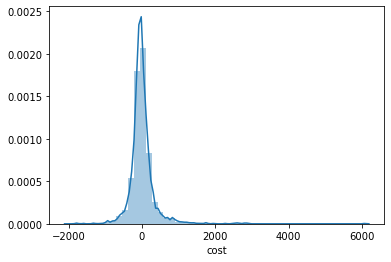

In [108]:
sns.distplot(y_test-predrf)
plt.show()

In [110]:
# Saving the predicted value to .csv

prediction = pd.DataFrame(predrf, columns=['Predictions']).to_csv('Data/Predicted_restaurant_food_cost.csv')

In [111]:
# Saving RandomForestRegressor

import joblib
joblib.dump(rf, 'rf_restaurant_food_cost.pkl')

['rf_restaurant_food_cost.pkl']